In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [3]:
#Let's load the fashion_mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [4]:
#It consists of 60,000 images
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [5]:
#We normalize the input to be in [0,1], and separate the first 5000 points as a validation set
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
#The class names correspond to the classes in the data sets
class_names = ['Tshirt',"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

Coat


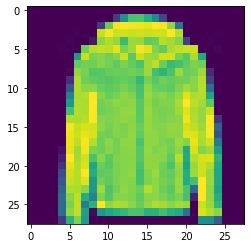

In [7]:
#The first item is a coat
print(class_names[y_train[0]])
plt.imshow(X_train[0])

In [8]:
#We build a neural network
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation = "sigmoid"))
model.add(keras.layers.Dense(100,activation = "sigmoid"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
weights, biases = model.layers[1].get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [12]:
#Compile the model ith the loss, metric, and optimizer
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [13]:
#We train the model and report its accuracy
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 1.9409 - accuracy: 0.4645 - val_loss: 1.4739 - val_accuracy: 0.5570
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2084 - accuracy: 0.6658 - val_loss: 1.0058 - val_accuracy: 0.7192
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9146 - accuracy: 0.7166 - val_loss: 0.8264 - val_accuracy: 0.7278
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7826 - accuracy: 0.7334 - val_loss: 0.7292 - val_accuracy: 0.7500
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7100 - accuracy: 0.7465 - val_loss: 0.6727 - val_accuracy: 0.7626
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6652 - accuracy: 0.7565 - val_loss: 0.6360 - val_accuracy: 0.7714
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6329 - accuracy: 0.7676 - val_loss: 0.6053 - val_accuracy:

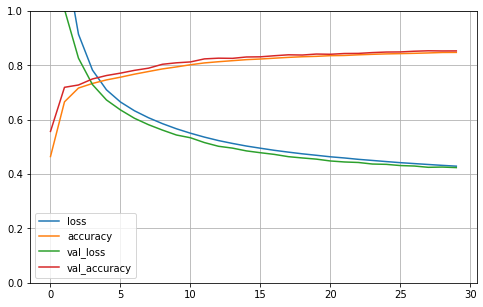

In [14]:
#Here we can visualize the training and validation accuracy across epochs
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
#Now we test the data on the training set.
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.9031 - accuracy: 0.7671


[0.903107225894928, 0.7670999765396118]

In [8]:
#Challenge 1: Can you improve test accuracy by adjusting the parameters of the model?
#Yes, switching from sigmoid to ReLu improves the test accuracy
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7204 - accuracy: 0.7618 - val_loss: 0.5208 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4901 - accuracy: 0.8293 - val_loss: 0.4462 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4462 - accuracy: 0.8432 - val_loss: 0.4202 - val_accuracy: 0.8544
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4178 - accuracy: 0.8544 - val_loss: 0.4183 - val_accuracy: 0.8582
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3965 - accuracy: 0.8594 - val_loss: 0.4401 - val_accuracy: 0.8434
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3803 - accuracy: 0.8657 - val_loss: 0.3651 - val_accuracy: 0.8756
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3662 - accuracy: 0.8702 - val_loss: 0.3588 - val_accuracy:

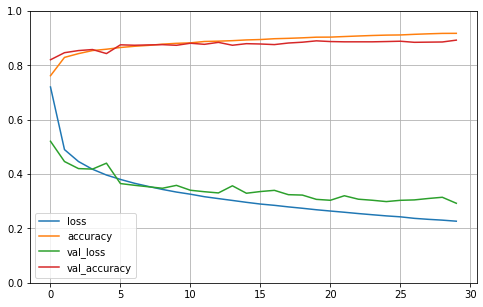

In [9]:
#Here we can visualize the training and validation accuracy across epochs
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 0s 2ms/step - loss: 60.6144 - accuracy: 0.8611


[60.614444732666016, 0.8611000180244446]

In [47]:
#Challenge 2: Can you implement this model on the MNIST data set? It can be obtained here: 
#https://keras.io/api/datasets/mnist/
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_test = X_test/255.0
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [48]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7471 - accuracy: 0.7924 - val_loss: 0.3146 - val_accuracy: 0.9132
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2912 - accuracy: 0.9156 - val_loss: 0.2380 - val_accuracy: 0.9322
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2287 - accuracy: 0.9333 - val_loss: 0.1938 - val_accuracy: 0.9462
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1908 - accuracy: 0.9445 - val_loss: 0.1673 - val_accuracy: 0.9524
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1630 - accuracy: 0.9525 - val_loss: 0.1481 - val_accuracy: 0.9580
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1442 - accuracy: 0.9577 - val_loss: 0.1315 - val_accuracy: 0.9642
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1283 - accuracy: 0.9630 - val_loss: 0.1240 - val_accuracy:

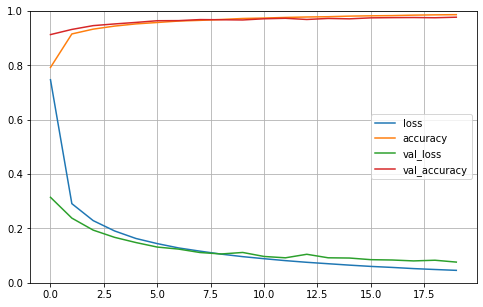

In [49]:
#Here we can visualize the training and validation accuracy across epochs
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9724


[0.08809079229831696, 0.9724000096321106]

In [17]:
#We now look at a regression problem, the california housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
housing = fetch_california_housing()

In [19]:
#We load the data, and scale it using StandardScaler
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
#We then train the model
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu", input_shape = X_train.shape[1:]), 
                                 keras.layers.Dense(1)])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train,y_train,epochs=20,validation_data = (X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0862 - val_loss: 0.8438
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6051 - val_loss: 0.4674
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4784 - val_loss: 0.4347
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4668 - val_loss: 0.4210
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4364 - val_loss: 0.4032
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4206 - val_loss: 0.3956
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4165 - val_loss: 0.4090
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_loss: 0.3891
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4047 - val_loss: 0.3856
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4045 - val_loss: 0.3808

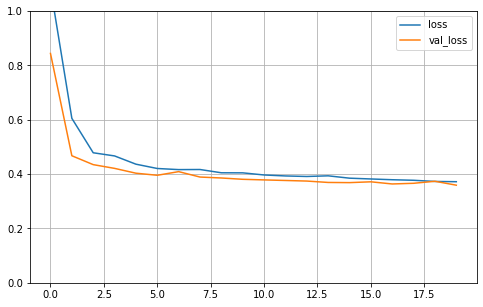

In [24]:
#Here we can visualize the training and validation accuracy across epochs
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
#Let's see the loss on the test data
mse_test = model.evaluate(X_test,y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.3525


In [26]:
#Let's see what it predicts for new data
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

[[1.923393 ]
 [2.8083143]
 [2.2340703]]


In [27]:
#Let's compare with an off-the-shelf random forest...the random forest has much larger loss.
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train_full,y_train_full)
y_pred = regr.predict(X_test)
loss = np.average((y_pred - y_test)**2)
print(loss)

1.3362180187525179


In [306]:
#The Universal Approximation Theorem says that any continuous function can be approximated 
#arbitrarily well by a neural network. Let's try a simple example: a quadratic! You may observe how stochastic this
#pipeline is -- you'll get wildly different results running the same network/data a few times. Anyhow, try adding 
# more layers, or more neurons per layer, and see what gives the best approximations. When you've tried that, move 
#on to a 2D Gaussian curve np.exp(-x**2 - y**2), and plot the results.

In [69]:
T = list(np.linspace(-2,2,1000))
N = [np.sin(t) for t in T]
model = keras.models.Sequential()
model.add(keras.layers.Dense(50,activation = "relu", input_shape = [1]))
model.add(keras.layers.Dense(10,activation = "relu"))
model.add(keras.layers.Dense(1,activation = "relu"))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss = "mean_squared_error", optimizer = opt)
history = model.fit(T,N,epochs=100, verbose = 0)


In [70]:
N_pred = model.predict(T)

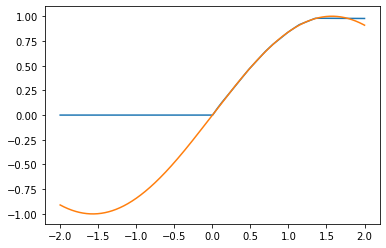

In [71]:
plt.plot(T,N_pred)
plt.plot(T,N)

In [1]:
#Now let's play around with Gradient Descent!

In [52]:
#We'll make an N*N grid with values ranging from -L to L
N = 100
L = 100
xsfun = np.linspace(-L,L,N)
ysfun = np.linspace(-L,L,N)
grid = np.zeros((N,N))

In [54]:
#Here are two default functions. The  first is a simple parabolic function. The second is made by summing
#Gaussians centered at random points.
def square(x,y):
    return x*x+y*y

np.random.seed(20)
centers = np.random.uniform(-L,L,size=(10,2))

def crazy(x,y):
    z = 0
    d = [np.exp(-1*((x - center[0])**2 + (y - center[1])**2)/1000) for center in centers]
    return 10 - np.sum(d)


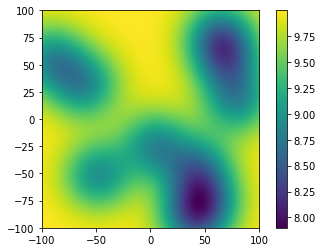

In [55]:
#Here's what our random function looks like!
for i in range(N):
    for j in range(N):
        grid[i,j] = crazy(xsfun[i],ysfun[j])
        
plt.imshow(grid,extent=[-L,L,-L,L],origin='lower')
plt.colorbar()

In [56]:
#We define a function which computes approximate gradients
def gradient(f,x,y):
    h = 0.00001
    grad_x = (f(x+h,y) - f(x,y))/h
    grad_y = (f(x,y+h) - f(x,y))/h
    #print (grad_x,grad_y)
    return (grad_x,grad_y)

#Next, we define a function which uses gradients to take steps
def step(x,y,f,eta):
    grad_x, grad_y = gradient(f,x,y)
    return x-eta*grad_x, y-eta*grad_y

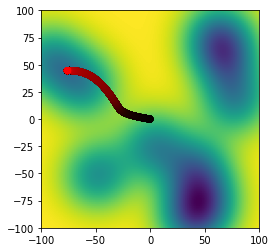

In [12]:
#Finally, let's plot the trajectory of our gradient descent from a fixed point.
#It's good, a litle slow...
x,y = (0,0)
M = 10000
eta = 1
color = np.zeros((M,3))
color[:,0] = np.linspace(0.01,1,M)
xs = []
ys = []
plt.imshow(grid,extent=[-L,L,-L,L],origin='lower')
for i in range(M):
    x,y = step(x,y,crazy,eta)
    xs.append(x)
    ys.append(y)
plt.scatter(xs,ys,color=color)

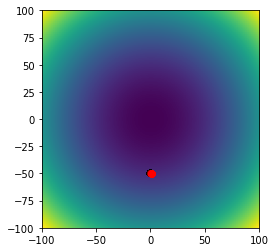

In [59]:
#Let's start from another point...we went to another minima.
x,y = (0,-50)
M = 10000
eta = 1
color = np.zeros((M,3))
color[:,0] = np.linspace(0.01,1,M)
xs = []
ys = []
plt.imshow(grid,extent=[-L,L,-L,L],origin='lower')
for i in range(M):
    x,y = step(x,y,crazy,eta)
    xs.append(x)
    ys.append(y)
plt.scatter(xs,ys,color=color)

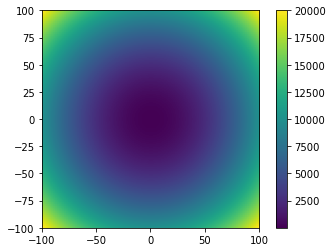

In [57]:
#Challenge 3: Implement the above examples using the 'square' function, instead of the 'crazy' one. What do you observe about the convergence?
for i in range(N):
    for j in range(N):
        grid[i,j] = square(xsfun[i],ysfun[j])
        
plt.imshow(grid,extent=[-L,L,-L,L],origin='lower')
plt.colorbar()

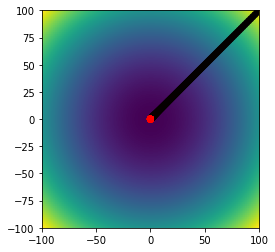

In [64]:
#Finally, let's plot the trajectory of our gradient descent from a fixed point.
x,y = (100,100)
M = 10000
eta = 0.01
color = np.zeros((M,3))
color[:,0] = np.linspace(0.01,1,M)
xs = []
ys = []
plt.imshow(grid,extent=[-L,L,-L,L],origin='lower')
for i in range(M):
    x,y = step(x,y,square,eta)
    xs.append(x)
    ys.append(y)
plt.scatter(xs,ys,color=color)

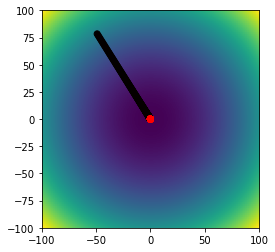

In [65]:
x,y = (-50,80)
M = 10000
eta = 0.01
color = np.zeros((M,3))
color[:,0] = np.linspace(0.01,1,M)
xs = []
ys = []
plt.imshow(grid,extent=[-L,L,-L,L],origin='lower')
for i in range(M):
    x,y = step(x,y,square,eta)
    xs.append(x)
    ys.append(y)
plt.scatter(xs,ys,color=color)

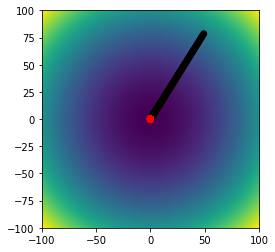

In [66]:
x,y = (50,80)
M = 10000
eta = 0.01
color = np.zeros((M,3))
color[:,0] = np.linspace(0.01,1,M)
xs = []
ys = []
plt.imshow(grid,extent=[-L,L,-L,L],origin='lower')
for i in range(M):
    x,y = step(x,y,square,eta)
    xs.append(x)
    ys.append(y)
plt.scatter(xs,ys,color=color)